In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import metrics
import networkx as nx

## 1. Simulate a DGP where the outcome of interest depends on a randomly assigned treatment and some observed covariates.

  $Y_i = a + b * X + c * Z + d * W$
  
  covariates: $Z,W$
  
  An example of a real-life situation: I want to know the influence of temperature on precipitation, but variables such as altitude,    longitude and latitude and local humidity will also affect precipitation.
  
  X - temperature, Z - altitude, W - humidity,  Y - precipitation.

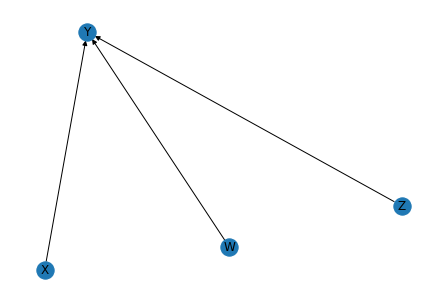

In [6]:
G = nx.DiGraph()
    
G.add_node('s1', desc='Y')
G.add_node('s2', desc='X')
G.add_node('s3', desc='Z')
G.add_node('s4', desc='W')
G.add_edge('s2','s1')
G.add_edge('s3','s1')
G.add_edge('s4','s1')
    
pos = nx.spring_layout(G)
nx.draw(G, pos)
node_labels = nx.get_node_attributes(G, 'desc')
nx.draw_networkx_labels(G, pos, labels=node_labels)
plt.show()

In [21]:
n = 100
a = 0.5
c = 1.2
d = 2.1
slope_estimates_a = []
slope_estimates_b = []
bias_estimates_a = []
bias_estimates_b = []

### When sample size is 100.

In [22]:
slope_estimates_a.clear()
slope_estimates_b.clear()
bias_estimates_a.clear()
bias_estimates_b.clear()

for mc_replication in range(100):
    b = np.random.rand(1)
    X = np.random.uniform(0, 1, n)
    Z = np.random.uniform(0, 1, n)
    W = np.random.uniform(0, 1, n)
    
    # a.You do not control for any covariates
    Ya = a + b * X + c * Z + d * W  
    mod_a = sm.OLS(Ya, sm.add_constant(X))
    res_a = mod_a.fit()
    slope_estimates_a = slope_estimates_a + [res_a.params[1]]
    bias_estimates_a = bias_estimates_a + [res_a.params[0]]
    
    # b.You control for all the covariates that affect the outcome
    Yb = a + b * X                  
    mod_b = sm.OLS(Yb, sm.add_constant(X))
    res_b = mod_b.fit()
    slope_estimates_b = slope_estimates_b + [res_b.params[1]]
    bias_estimates_b = bias_estimates_b + [res_b.params[0]]

**a.You do not control for any covariates**

In [23]:
print('slope_estimate:',np.mean(slope_estimates_a))
print('bias_estimate:',np.mean(bias_estimates_a))

slope_estimate: 0.5470736699208859
bias_estimate: 2.101505785361163


In [24]:
b0 = b*np.ones([100,1])
temp = slope_estimates_a - b0
bias = np.mean(temp)
rmse = np.sqrt(np.mean(temp**2))
print('RMSE:',rmse,'bias:',bias)

RMSE: 0.4326302503638861 bias: 0.2736696427086273


**b.You control for all the covariates that affect the outcome**

In [25]:
print('slope_estimate:',np.mean(slope_estimates_b))
print('bias_estimate:',np.mean(bias_estimates_b))

slope_estimate: 0.47924789617553765
bias_estimate: 0.5


In [26]:
b0 = b*np.ones([100,1])
temp = slope_estimates_b - b0
bias = np.mean(temp)
rmse = np.sqrt(np.mean(temp**2))
print('RMSE:',rmse,'bias:',bias)

RMSE: 0.3394640429194407 bias: 0.20584386896327905


### When the sample size is 1000.

In [27]:
slope_estimates_a.clear()
slope_estimates_b.clear()
bias_estimates_a.clear()
bias_estimates_b.clear()

for mc_replication in range(1000):
    b = np.random.rand(1)
    X = np.random.uniform(0, 1, n)
    Z = np.random.uniform(0, 1, n)
    W = np.random.uniform(0, 1, n)
    
    # a.You do not control for any covariates
    Ya = a + b * X + c * Z + d * W  
    mod_a = sm.OLS(Ya, sm.add_constant(X))
    res_a = mod_a.fit()
    slope_estimates_a = slope_estimates_a + [res_a.params[1]]
    bias_estimates_a = bias_estimates_a + [res_a.params[0]]
    # b.You control for all the covariates that affect the outcome
    Yb = a + b * X                  
    mod_b = sm.OLS(Yb, sm.add_constant(X))
    res_b = mod_b.fit()
    slope_estimates_b = slope_estimates_b + [res_b.params[1]]
    bias_estimates_b = bias_estimates_b + [res_b.params[0]]

**a.You do not control for any covariates**

In [28]:
print('slope_estimate:',np.mean(slope_estimates_a))
print('bias_estimate:',np.mean(bias_estimates_a))

slope_estimate: 0.5086792866784179
bias_estimate: 2.1441462201628183


In [29]:
b0 = b*np.ones([1000,1])
temp = slope_estimates_a - b0
bias = np.mean(temp)
rmse = np.sqrt(np.mean(temp**2))
print('RMSE:',rmse,'bias:',bias)

RMSE: 0.38671425144159954 bias: 0.03931660949723313


**b.You control for all the covariates that affect the outcome**

In [30]:
print('slope_estimate:',np.mean(slope_estimates_b))
print('bias_estimate:',np.mean(bias_estimates_b))

slope_estimate: 0.4995797858157573
bias_estimate: 0.5


In [31]:
b0 = b*np.ones([1000,1])
temp = slope_estimates_b - b0
bias = np.mean(temp)
rmse = np.sqrt(np.mean(temp**2))
print('RMSE:',rmse,'bias:',bias)

RMSE: 0.29043752641910253 bias: 0.030217108634572568


From the results, when the sample size is large(=1000), the difference between the true and estimated values is small.

## 2. Simulate a DGP with a confounder (common cause)

   $Y_i= a + b * X_i$
   
   $Z_i = c + d * X_i$
   
   An example of a real-life situation:
   
   Z - worker education, Y - worker productivity, X - other characteristics which can cause both education and productivity
   

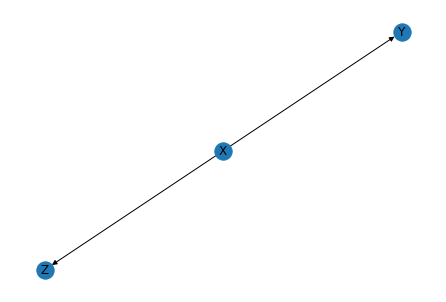

In [35]:
G = nx.DiGraph()
    
G.add_node('s1', desc='Y')
G.add_node('s2', desc='X')
G.add_node('s3', desc='Z')
G.add_edge('s2','s1')
G.add_edge('s2','s3')
    
pos = nx.spring_layout(G)
nx.draw(G, pos)
node_labels = nx.get_node_attributes(G, 'desc')
nx.draw_networkx_labels(G, pos, labels=node_labels)
plt.show()

In [61]:
a = 1.5
b = 1.2
c = 2.1
d = 2.5

### When the sample size is 100.

In [62]:
slope_estimates_a.clear()
slope_estimates_b.clear()
bias_estimates_a.clear()
bias_estimates_b.clear()

for mc_replication in range(100):
    X = np.random.uniform(0, 1, n)
    
    # a. fail to control for the confounder
    Ya = a + b * X
    Z = c + d * X 
    mod_a = sm.OLS(Ya, sm.add_constant(Z))
    res_a = mod_a.fit()
    slope_estimates_a = slope_estimates_a + [res_a.params[1]]
    bias_estimates_a = bias_estimates_a + [res_a.params[0]]
    
    # b. control for the confounder
    Yb = a + b * X 
    mod_b = sm.OLS(Yb, sm.add_constant(X))
    res_b = mod_b.fit()
    slope_estimates_b = slope_estimates_b + [res_b.params[1]]
    bias_estimates_b = bias_estimates_b + [res_b.params[0]]

**a. Fail to control for the confounder**

In [63]:
print('slope_estimate:',np.mean(slope_estimates_a))
print('bias_estimate:',np.mean(bias_estimates_a))

slope_estimate: 0.47999999999999987
bias_estimate: 0.49199999999999977


In [64]:
b0 = b*np.ones([100,1])
temp = slope_estimates_a - b0
bias = np.mean(temp)
rmse = np.sqrt(np.mean(temp**2))
print('RMSE:',rmse,'bias:',bias)

RMSE: 0.72 bias: -0.72


**b.You do control for the confounder**

In [65]:
print('slope_estimate:',np.mean(slope_estimates_b))
print('bias_estimate:',np.mean(bias_estimates_b))

slope_estimate: 1.2
bias_estimate: 1.5


In [66]:
b0 = b*np.ones([100,1])
temp = slope_estimates_b - b0
bias = np.mean(temp)
rmse = np.sqrt(np.mean(temp**2))
print('RMSE:',rmse,'bias:',bias)

RMSE: 4.1954092705889643e-16 bias: -1.1102230246251566e-17


### When the sample size is 1000.

In [67]:
slope_estimates_a.clear()
slope_estimates_b.clear()
bias_estimates_a.clear()
bias_estimates_b.clear()

for mc_replication in range(1000):
    X = np.random.uniform(0, 1, n)
    
    # a. fail to control for the confounder
    Ya = a + b * X
    Z = c + d * X 
    mod_a = sm.OLS(Ya, sm.add_constant(Z))
    res_a = mod_a.fit()
    slope_estimates_a = slope_estimates_a + [res_a.params[1]]
    bias_estimates_a = bias_estimates_a + [res_a.params[0]]
    
    # b. control for the confounder
    Yb = a + b * X 
    mod_b = sm.OLS(Yb, sm.add_constant(X))
    res_b = mod_b.fit()
    slope_estimates_b = slope_estimates_b + [res_b.params[1]]
    bias_estimates_b = bias_estimates_b + [res_b.params[0]]

**a. Fail to control for the confounder**

In [68]:
print('slope_estimate:',np.mean(slope_estimates_a))
print('bias_estimate:',np.mean(bias_estimates_a))

slope_estimate: 0.48
bias_estimate: 0.492


In [69]:
b0 = b*np.ones([1000,1])
temp = slope_estimates_a - b0
bias = np.mean(temp)
rmse = np.sqrt(np.mean(temp**2))
print('RMSE:',rmse,'bias:',bias)

RMSE: 0.7199999999999999 bias: -0.7199999999999992


**b.You do control for the confounder**

In [70]:
print('slope_estimate:',np.mean(slope_estimates_b))
print('bias_estimate:',np.mean(bias_estimates_b))

slope_estimate: 1.1999999999999995
bias_estimate: 1.5


In [71]:
b0 = b*np.ones([1000,1])
temp = slope_estimates_b - b0
bias = np.mean(temp)
rmse = np.sqrt(np.mean(temp**2))
print('RMSE:',rmse,'bias:',bias)

RMSE: 4.861712133876764e-16 bias: -1.865174681370263e-17


From the results, the sample size has a negligible effect on the difference between the true and estimated values.

## 3. Simulate a DGP with selection bias into the treatment (variable in between the path from the treatment to the outcome).

  $Y = a + b * X + 0.3 *Z$ 
  
  $X = 0.2 * Z + e$
  
  An example of a real-life situation: I want to know the effect of job performance on salary, and effort has an impact on both job performance and salary.
  
  Z - Effort,
  X - Job Performance,
  Y - Salary increase

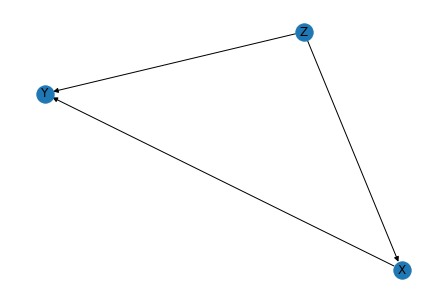

In [92]:
G = nx.DiGraph()
    
G.add_node('s1', desc='Y')
G.add_node('s2', desc='X')
G.add_node('s3', desc='Z')
G.add_edge('s2','s1')
G.add_edge('s3','s1')
G.add_edge('s3','s2')
    
pos = nx.spring_layout(G)
nx.draw(G, pos)
node_labels = nx.get_node_attributes(G, 'desc')
nx.draw_networkx_labels(G, pos, labels=node_labels)
plt.show()

In [117]:
a = 1.2
b = 2.1
n = 100

### When the sample size is 100.

In [118]:
slope_estimates_a.clear()
slope_estimates_b.clear()
bias_estimates_a.clear()
bias_estimates_b.clear()

for mc_replication in range(100):
    e = np.random.normal(0,1,n)
    Z = np.random.uniform(0, 1, n)
    X = 0.2 * Z + e
    Y = a + b * X +0.3 * Z
    
    # a. Control for the variable in between the path from cause to effect    
    mod_a = sm.OLS(Y, sm.add_constant(X))
    res_a = mod_a.fit()
    slope_estimates_a = slope_estimates_a + [res_a.params[1]]
    bias_estimates_a = bias_estimates_a + [res_a.params[0]]
    
    # b. Do not control for the variable in between the path from cause to effect
    mod_b = sm.OLS(Y, sm.add_constant(Z))
    res_b = mod_b.fit()
    slope_estimates_b = slope_estimates_b + [res_b.params[1]]
    bias_estimates_b = bias_estimates_b + [res_b.params[0]]

**a. You control for the variable in between the path from cause to effect**

In [119]:
print('slope_estimate:',np.mean(slope_estimates_a))
print('bias_estimate:',np.mean(bias_estimates_a))

slope_estimate: 2.1046340555589085
bias_estimate: 1.3494162184337253


In [120]:
b0 = b*np.ones([100,1])
temp = slope_estimates_a - b0
bias = np.mean(temp)
rmse = np.sqrt(np.mean(temp**2))
print('RMSE:',rmse,'bias:',bias)

RMSE: 0.009596014652324757 bias: 0.004634055558908883


**b.You do not control for the variable in between the path from cause to effect**

In [121]:
print('slope_estimate:',np.mean(slope_estimates_b))
print('bias_estimate:',np.mean(bias_estimates_b))

slope_estimate: 0.6914321242201066
bias_estimate: 1.2100477400600849


In [122]:
b0 = b*np.ones([n,1])
temp = slope_estimates_b - b0
bias = np.mean(temp)
rmse = np.sqrt(np.mean(temp**2))
print('RMSE:',rmse,'bias:',bias)

RMSE: 1.5628355255173485 bias: -1.4085678757798934


### When the sample size is 1000.

In [123]:
slope_estimates_a.clear()
slope_estimates_b.clear()
bias_estimates_a.clear()
bias_estimates_b.clear()

for mc_replication in range(1000):
    e = np.random.normal(0,1,n)
    Z = np.random.uniform(0, 1, n)
    X = 0.2 * Z + e
    Y = a + b * X +0.3 * Z
    
    # a. Control for the variable in between the path from cause to effect    
    mod_a = sm.OLS(Y, sm.add_constant(X))
    res_a = mod_a.fit()
    slope_estimates_a = slope_estimates_a + [res_a.params[1]]
    bias_estimates_a = bias_estimates_a + [res_a.params[0]]
    
    # b. Do not control for the variable in between the path from cause to effect
    mod_b = sm.OLS(Y, sm.add_constant(Z))
    res_b = mod_b.fit()
    slope_estimates_b = slope_estimates_b + [res_b.params[1]]
    bias_estimates_b = bias_estimates_b + [res_b.params[0]]

**a. You control for the variable in between the path from cause to effect**

In [124]:
print('slope_estimate:',np.mean(slope_estimates_a))
print('bias_estimate:',np.mean(bias_estimates_a))

slope_estimate: 2.105164493363438
bias_estimate: 1.3500323120375897


In [125]:
b0 = b*np.ones([1000,1])
temp = slope_estimates_a - b0
bias = np.mean(temp)
rmse = np.sqrt(np.mean(temp**2))
print('RMSE:',rmse,'bias:',bias)

RMSE: 0.009945024884527535 bias: 0.0051644933634379326


**b.You do not control for the variable in between the path from cause to effect**

In [126]:
print('slope_estimate:',np.mean(slope_estimates_b))
print('bias_estimate:',np.mean(bias_estimates_b))

slope_estimate: 0.7440597377926256
bias_estimate: 1.1949043119170277


In [127]:
b0 = b*np.ones([1000,1])
temp = slope_estimates_b - b0
bias = np.mean(temp)
rmse = np.sqrt(np.mean(temp**2))
print('RMSE:',rmse,'bias:',bias)

RMSE: 1.5398757765267572 bias: -1.3559402622073744


From the results, when the sample size is large, the difference between the true and estimated values is lager.

## 4. Simulate a DGP where the outcome variable is overrepresented at 0.
   
   $Y = 0 + 0 * X + e$
   
   An example of a real-life situation: I want to know the relationship between height and income.
   
   X - height, Y - income.

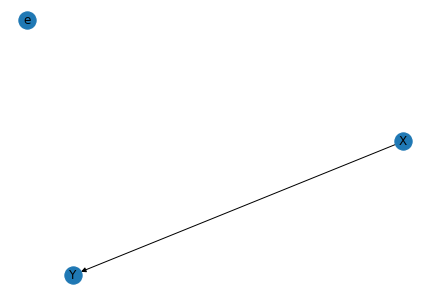

In [132]:
G = nx.DiGraph()
    
G.add_node('s1', desc='Y')
G.add_node('s2', desc='X')
G.add_node('s3', desc='e')
G.add_edge('s2','s1')
    
pos = nx.spring_layout(G)
nx.draw(G, pos)
node_labels = nx.get_node_attributes(G, 'desc')
nx.draw_networkx_labels(G, pos, labels=node_labels)
plt.show()

In [85]:
a = 0
b = 0
n = 100
slope_estimates = []
bias_estimates = []

### When the sample size is 100.

In [86]:
slope_estimates.clear()
bias_estimates.clear()

for mc_replication in range(100):
    X = np.random.uniform(0, 1, n)
    e = np.random.normal(0,1,n)
    Y = a + b * X + e
    mod = sm.OLS(Y, sm.add_constant(X))
    res = mod.fit()
    slope_estimates = slope_estimates + [res.params[1]]
    bias_estimates = bias_estimates + [res.params[0]]

In [87]:
print('slope_estimate:',np.mean(slope_estimates))
print('bias_estimate:',np.mean(bias_estimates))

slope_estimate: 0.02022530702463229
bias_estimate: -0.013021682994910784


In [88]:
b0 = b*np.ones([100,1])
temp = slope_estimates- b0
bias = np.mean(temp)
rmse = np.sqrt(np.mean(temp**2))
print('RMSE:',rmse,'bias:',bias)

RMSE: 0.37809211577809737 bias: 0.020225307024632287


### When the sample size is 1000.

In [89]:
slope_estimates.clear()
bias_estimates.clear()

for mc_replication in range(1000):
    X = np.random.uniform(0, 1, n)
    e = np.random.normal(0,1,n)
    Y = a + b * X + e
    mod = sm.OLS(Y, sm.add_constant(X))
    res = mod.fit()
    slope_estimates = slope_estimates + [res.params[1]]
    bias_estimates = bias_estimates + [res.params[0]]

In [90]:
print('slope_estimate:',np.mean(slope_estimates))
print('bias_estimate:',np.mean(bias_estimates))

slope_estimate: 0.012944267745481781
bias_estimate: -0.002581095159136812


In [91]:
b0 = b*np.ones([1000,1])
temp = slope_estimates - b0
bias = np.mean(temp)
rmse = np.sqrt(np.mean(temp**2))
print('RMSE:',rmse,'bias:',bias)

RMSE: 0.3462191361904342 bias: 0.012944267745481783


From the results, when the sample size is large, the difference between the true and estimated values is small.